In [9]:
import pandas as pd
import csv
import matplotlib.pyplot as plt

closed_file = 'NBA PROJECTS.csv'

nba = pd.read_csv(closed_file)

nba = nba.loc[(nba['Tm'] != 'TOT')& (nba['Year'] >= 1990)] 
print(nba)
print(nba.columns)

       Unnamed: 0    Year             Player Pos   Age   Tm     G    GS  \
9547         9547  1990.0         Mark Acres   C  27.0  ORL  80.0  50.0   
9548         9548  1990.0      Michael Adams  PG  27.0  DEN  79.0  74.0   
9549         9549  1990.0       Mark Aguirre  SF  30.0  DET  78.0  40.0   
9550         9550  1990.0        Danny Ainge  PG  30.0  SAC  75.0  68.0   
9551         9551  1990.0        Mark Alarie  PF  26.0  WSB  82.0  10.0   
...           ...     ...                ...  ..   ...  ...   ...   ...   
24686       24686  2017.0        Cody Zeller  PF  24.0  CHO  62.0  58.0   
24687       24687  2017.0       Tyler Zeller   C  27.0  BOS  51.0   5.0   
24688       24688  2017.0  Stephen Zimmerman   C  20.0  ORL  19.0   0.0   
24689       24689  2017.0        Paul Zipser  SF  22.0  CHI  44.0  18.0   
24690       24690  2017.0        Ivica Zubac   C  19.0  LAL  38.0  11.0   

           MP   PER  ...    FT%    ORB    DRB    TRB    AST    STL   BLK  \
9547   1691.0   8.3  ..

In [17]:
nba = nba.replace({'Tm':{'WSB':'WAS', 'VAN': 'MEM', 'NJN': 'BRK', 'SEA': 'OKC', 
                         'CHH':'NOP', 'NOH': 'NOP', 'NOK': 'NOP', 'CHO':'CHA' }})
print(nba["Tm"].unique())
print(nba[['Year', 'Player', 'Tm', '3PA']])


# SEA---> OKC 
#CHH NOH NOK-----> NOP 
#CHO--->CHA

['ORL' 'DEN' 'DET' 'SAC' 'WAS' 'DAL' 'MIL' 'NOP' 'PHI' 'SAS' 'CHI' 'BOS'
 'UTA' 'LAC' 'OKC' 'ATL' 'PHO' 'CLE' 'GSW' 'BRK' 'HOU' 'MIN' 'POR' 'LAL'
 'NYK' 'MIA' 'IND' 'MEM' 'TOR' 'CHA']
         Year             Player   Tm    3PA
9547   1990.0         Mark Acres  ORL    4.0
9548   1990.0      Michael Adams  DEN  432.0
9549   1990.0       Mark Aguirre  DET   93.0
9550   1990.0        Danny Ainge  SAC  289.0
9551   1990.0        Mark Alarie  WAS   49.0
...       ...                ...  ...    ...
24686  2017.0        Cody Zeller  CHA    1.0
24687  2017.0       Tyler Zeller  BOS    1.0
24688  2017.0  Stephen Zimmerman  ORL    0.0
24689  2017.0        Paul Zipser  CHI   99.0
24690  2017.0        Ivica Zubac  LAL    3.0

[13777 rows x 4 columns]


In [22]:
teams = nba.groupby(['Tm', 'Year'])
teams['WS'].sum()

Tm   Year  
ATL  1990.0    42.8
     1991.0    43.8
     1992.0    37.5
     1993.0    40.0
     1994.0    56.8
               ... 
WAS  2013.0    34.5
     2014.0    45.3
     2015.0    45.4
     2016.0    39.7
     2017.0    46.9
Name: WS, Length: 813, dtype: float64

In [23]:
x = teams['3PA'].mean()
y = teams['WS'].mean()
plt.scatter(x,y)

KeyError: 'Column not found: W-L%'

Which Player would you like to study?


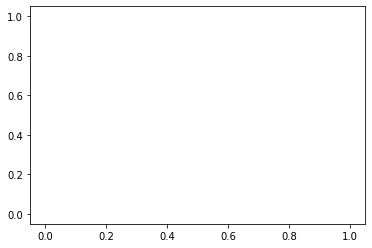

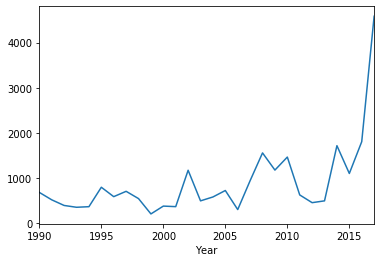